- 训练集长度分布

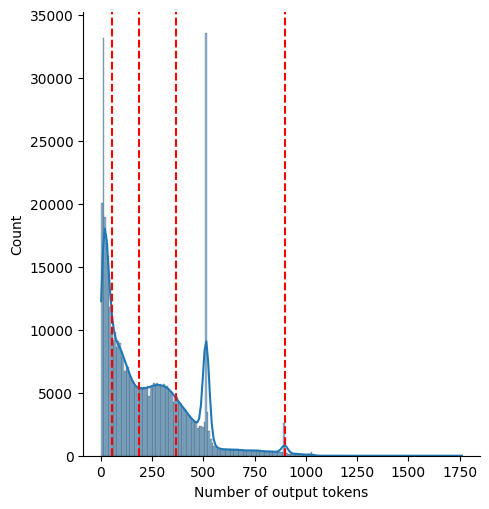

In [11]:
import datasets
import seaborn as sns
import os
import matplotlib.pyplot as plt
import numpy as np

dataset_path = "data/vicuna-13b_first_nonuniform/"

token_nums = []

for split in ["train", "validation", "test"]:
    dataset = datasets.load_from_disk(os.path.join(dataset_path, split))
    token_nums.extend(dataset["num_tokens"])

# print(token_nums)
token_nums = [t.item() for t in token_nums]
tiles = np.percentile(token_nums, [25, 50, 75, 99])

g = sns.displot(token_nums, kde=True)
g.set_xlabels("Number of output tokens")

ax = g.ax
for tile in tiles:
    ax.axvline(tile, color="red", linestyle="--")

g.savefig(os.path.join(dataset_path, "token_len_distribution.png"))
g.savefig(os.path.join(dataset_path, "token_len_distribution.svg"))

- 可视化模型测试结果

Latency mean: 4.766 ms


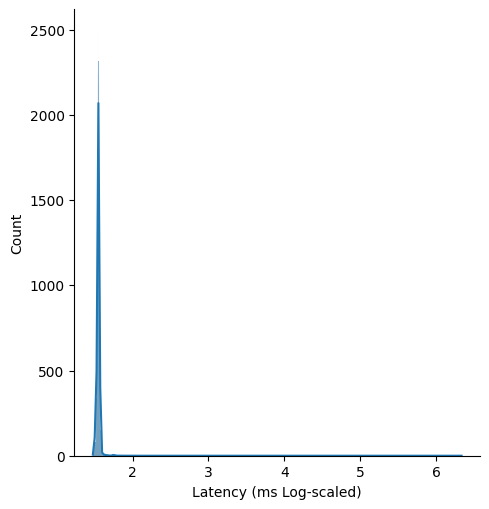

In [1]:
# latency测试
import seaborn as sns
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from config import *

df = pd.read_csv(os.path.join(result_path, "output.csv"))
latency = df["latency"].to_list()
latency_mean = np.mean(latency)
print(f"Latency mean: {latency_mean * 1e3:.3f} ms")
latency = [np.log(l * 1e3) for l in latency]

g = sns.displot(latency, kde=True)
g.set_xlabels("Latency (ms Log-scaled)")
g.savefig(os.path.join(result_path, "latency_distribution.png"))
g.savefig(os.path.join(result_path, "latency_distribution.svg"))

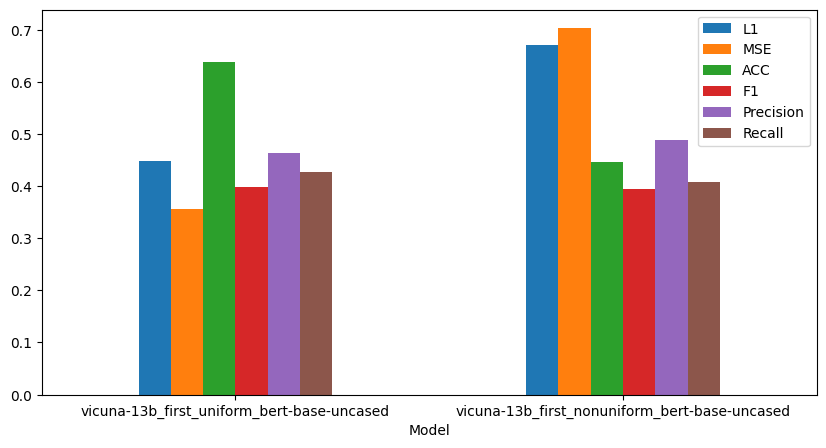

In [28]:
# 模型评价指标
import pandas as pd
import glob
import matplotlib.pyplot as plt

files = glob.glob("./result/**/metrics.csv", recursive=True)
df_list = []
for file in files:
    tmp = pd.read_csv(file)
    df_list.append(tmp)

df = pd.concat(df_list, ignore_index=True)
ax = df.plot(x="Model", y=["L1", "MSE", "ACC", "F1", "Precision", "Recall"], kind="bar", figsize=(10, 5))
plt.xticks(rotation=0)
fig = ax.get_figure()
fig.savefig("./result/metrics.png")
fig.savefig("./result/metrics.svg")